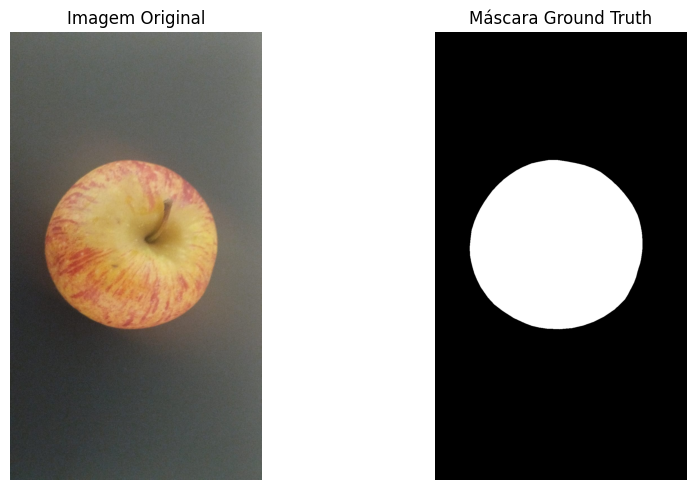

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img_path = "ft-DB/apple/7-01-V1-B.png"
mask_path = "ground-truth-masks/apple/7-01-V1-B_mask.png"

if not os.path.exists(img_path) or not os.path.exists(mask_path):
    raise FileNotFoundError("Verifique os caminhos das imagens!")

original = cv2.imread(img_path)

mask_bgr = cv2.imread(mask_path)

# Faixa da cor vermelha escura (BGR → [B, G, R] de #8C0303 → [3, 3, 140])
lower_red = np.array([0, 0, 120])   # mínimo da faixa de vermelho escuro
upper_red = np.array([10, 10, 160]) # máximo da faixa

# Cria máscara binária onde o vermelho está presente
mask_bin = cv2.inRange(mask_bgr, lower_red, upper_red)

# Exibe as imagens
plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")
plt.axis('off')

# Máscara binária
plt.subplot(1, 2, 2)
plt.imshow(mask_bin, cmap='gray')
plt.title("Máscara Ground Truth")
plt.axis('off')

plt.tight_layout()
plt.show()



In [2]:
# segmentação usando GaussianBlur ou Otsu

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Pasta de entrada (dataset com frutas)
input_dir = "ft-DB"

# Pasta de saída para máscaras automáticas
output_dir = "automatic_masks"

# Cria a pasta de saída, se não existir
os.makedirs(output_dir, exist_ok=True)

# Kernel para operações morfológicas
kernel = np.ones((5,5), np.uint8)

# Percorre cada classe
for class_name in sorted(os.listdir(input_dir)):
    class_input_path = os.path.join(input_dir, class_name)
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    for file_name in sorted(os.listdir(class_input_path)):
        if not file_name.endswith(".png"):
            continue

        # Caminho da imagem original
        img_path = os.path.join(class_input_path, file_name)

        # Carrega imagem original
        img = cv2.imread(img_path)
        if img is None:
            print(f"Erro ao carregar {img_path}")
            continue

        # Converte para tons de cinza
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Aplica desfoque Gaussiano para suavizar antes da segmentação
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Aplica Otsu para segmentação binária
        _, mask = cv2.threshold(blurred, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Limpa ruídos pequenos (abrir: erosão seguida de dilatação)
        mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

        # Preenche buracos (fechar: dilatação seguida de erosão)
        mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

        # Salva a máscara limpa como imagem binária com 0 e 255
        output_name = file_name.replace(".png", "_mask_auto.png")
        output_path = os.path.join(class_output_path, output_name)
        cv2.imwrite(output_path, (mask_clean * 255).astype(np.uint8))

        print(f"✅ Máscara limpa salva: {output_path}")


✅ Máscara limpa salva: automatic_masks\apple\7-01-V1-B_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-01-V1-W_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-01-V2-B_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-01-V2-W_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-02-V1-B_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-02-V1-W_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-02-V2-B_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-02-V2-W_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-03-V1-B_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-03-V1-W_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-03-V2-B_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-03-V2-W_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-04-V1-B_mask_auto.png
✅ Máscara limpa salva: automatic_masks\apple\7-04-V1-W_mask_auto.png
✅ Máscara limpa salva: automatic_m

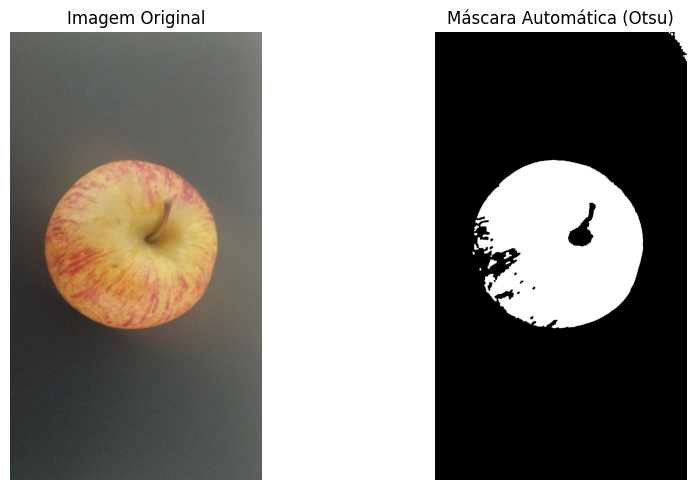

In [3]:
# Exemplo de visualização com imagem e máscara automática
example_img = "ft-DB/apple/7-01-V1-B.png"
example_mask = "automatic_masks/apple/7-01-V1-B_mask_auto.png"

# Carrega imagem e máscara gerada
img = cv2.imread(example_img)
mask = cv2.imread(example_mask, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Máscara Automática (Otsu)")
plt.axis('off')

plt.tight_layout()
plt.show()
